# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests as request
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

import matplotlib.pyplot as plt

In [2]:
#initialize variables given
avg_home_income=12000
my_spy=50
my_agg=200

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3


In [4]:
# Crypto API URLs
btc_url = 'https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD'
eth_url = 'https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD'

In [6]:
# Fetch current BTC price
btc_fetch_price=request.get(btc_url).json()
#BTC in USD
btc_price_data=btc_fetch_price
btc_current_price=btc_price_data['data']['1']['quotes']['USD']['price']
print(f"The current value of BTC is ${btc_current_price:0.2f} USD")

The current value of BTC is $47257.00 USD


In [8]:
# Fetch current ETH price
eth_fetch_price=request.get(eth_url).json()
eth_current_price=eth_fetch_price
#ETH in USD
eth_current_price=eth_current_price['data']['1027']['quotes']['USD']['price']
print(f"The current value of ETH is ${eth_current_price:0.2f} USD")

The current value of ETH is $3413.75 USD


In [9]:
# Compute current value of my crpto
total_crypto_value= (btc_current_price*my_btc)+(eth_current_price*my_eth)
print(total_crypto_value)
my_btc_value=btc_current_price*my_btc
my_eth_value=eth_current_price*my_eth
# Print current crypto wallet balance
print (f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print (f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

74801.275
The current value of your 1.2 BTC is $56708.40
The current value of your 5.3 ETH is $18092.88


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
from alpaca_trade_api.rest import REST, TimeFrame
alpaca_api_key=os.getenv('ALPACA_API_KEY')
alpaca_secret_key=os.getenv('ALPACA_SECRET_API_KEY')
# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")


In [12]:
# Format current date as ISO format
from datetime import datetime
today = pd.Timestamp("2022-03-29", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

In [13]:
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"
from alpaca_trade_api.rest import REST, TimeFrame

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# With 2 tickers unconcatinated in the Dataframe so I used limit=2000 to get 1000 days of data for each stock
investments_data = api.get_bars(tickers, TimeFrame.Day,"2018-04-10", "2022-03-28", limit=2000, adjustment='raw').df
investments_data.index = investments_data.index.date
# Preview DataFrame
investments_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
2018-04-10,106.95,106.9850,106.83,106.92,2955565,12688,106.897189,AGG
2018-04-11,107.05,107.0599,106.93,107.01,8598940,21146,106.995149,AGG
2018-04-12,106.91,106.9300,106.76,106.77,3899002,13576,106.806356,AGG
2018-04-13,106.69,106.8400,106.67,106.80,2764839,11536,106.786953,AGG
2018-04-16,106.64,106.8400,106.61,106.82,3860890,13789,106.777580,AGG


In [14]:
# Pick AGG and SPY close prices
investments_data=investments_data[['close', 'symbol']]

stock_close_data = pd.pivot_table(investments_data, values='close', 
                                  index=investments_data.index, columns=['symbol'])
agg_close_price=stock_close_data['AGG'][-1]
spy_close_price=stock_close_data['SPY'][-1]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $106.36
Current SPY closing price: $455.91


In [15]:
# Compute the current value of shares
my_agg_value=agg_close_price*my_agg
my_spy_value=spy_close_price*my_spy
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22795.50
The current value of your 200 AGG shares is $21272.00


### Savings Health Analysis

In [16]:
# Set monthly household income
avg_home_income=12000

# Consolidate financial assets data
crypto_assets=my_btc_value+my_eth_value
stock_bond_assets=my_spy_value+my_agg_value
crypto_assets
stock_bond_assets

consolidated_assets=crypto_assets+stock_bond_assets
# Create savings DataFrame

my_assets= pd.DataFrame({'Account':['Crypto', 'Stocks & Bonds', 'Total'],'Amount USD $':[crypto_assets, stock_bond_assets, consolidated_assets]})
my_assets= my_assets.set_index('Account')

# Display savings DataFrame
display(my_assets)

,Amount USD $
Account,
Crypto,74801.275
Stocks & Bonds,44067.500
Total,118868.775


array([<AxesSubplot:ylabel='Amount USD $'>], dtype=object)

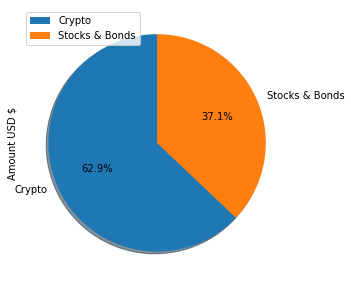

In [17]:
# Plot savings pie chart
my_asset_pie= pd.DataFrame({'Account':['Crypto', 'Stocks & Bonds'],'Amount USD $':[crypto_assets, stock_bond_assets]})
my_asset_pie= my_asset_pie.set_index('Account')
my_asset_pie_plt=my_asset_pie.plot.pie(subplots=True, figsize=(6,5), autopct='%1.1f%%', shadow=True, startangle=90)

my_asset_pie_plt

In [18]:
# Set ideal emergency fund
emergency_fund = avg_home_income * 3

# Calculate total amount of savings
savings_fund =consolidated_assets

# Validate saving health
if savings_fund > emergency_fund:
    print('Congratulations! You have enough money in your Emergency Fund.')
else:
    print('Let us review your savings goals and your Emergency Fund')

Congratulations! You have enough money in your Emergency Fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [19]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-03-28', tz='America/New_York').isoformat()

In [20]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_bars(tickers, TimeFrame.Day,start_date, end_date, limit=2000, adjustment='raw').df
df_stock_data.index = df_stock_data.index.date
stock_table = pd.pivot_table(df_stock_data, values='close', index=df_stock_data.index, columns=['symbol'])
stock_table

symbol,AGG,SPY
2016-05-02,110.61,208.03
2016-05-03,110.81,206.13
2016-05-04,110.86,204.96
2016-05-05,111.14,204.95
2016-05-06,110.97,205.70
...,...,...
2022-03-22,106.75,NaN
2022-03-23,107.19,NaN
2022-03-24,106.95,NaN
2022-03-25,106.10,NaN


In [21]:
port_price=(stock_table["AGG"]*0.4)+(stock_table['SPY']*0.6)
port_price=port_price.dropna()
port_price

2016-05-02    169.062
2016-05-03    168.002
2016-05-04    167.320
2016-05-05    167.426
2016-05-06    167.808
               ...   
2018-05-07    202.476
2018-05-08    202.428
2018-05-09    203.928
2018-05-10    205.536
2018-05-11    206.054
Length: 512, dtype: float64

In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
port_price=pd.DataFrame(port_price)
port_price_=port_price.set_axis(['close',], axis=1, inplace=True)
multi=pd.MultiIndex.from_tuples([('AGG/SPY','close')])
port_price.columns=multi
#stock_close_data_df
port_price.head()

,AGG/SPY
,close
2016-05-02,169.062
2016-05-03,168.002
2016-05-04,167.320
2016-05-05,167.426
2016-05-06,167.808


In [23]:
# Printing the simulation input data
num_sims=500

mc_aggspy= MCSimulation (portfolio_data
    =port_price,num_simulation
    =num_sims,num_trading_days 
    = 252*30)
# Printing the simulation input data
mc_aggspy


In [ ]:
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\trevg\Desktop\school\API-homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

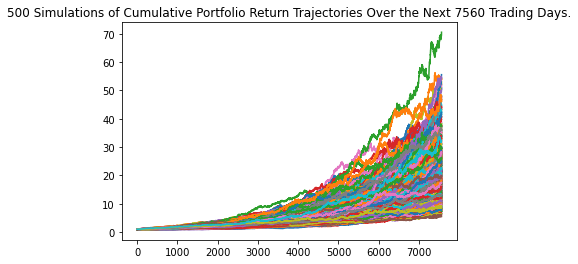

In [24]:
num_sims=500
trading_days=252
years=30
# Printing the simulation input data
mc_plot_aggspy=mc_aggspy.plot_simulation() 
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# Plot simulation outcomes
mc_plot_aggspy

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

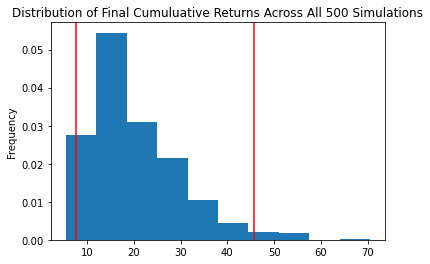

In [25]:
# Plot probability distribution and confidence intervals

mc_distplot_aggspy=mc_aggspy.plot_distribution()
mc_distplot_aggspy

### Retirement Analysis

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_stats_aggspy=mc_aggspy.summarize_cumulative_return()

# Print summary statistics
mc_stats_aggspy

count           500.000000
mean             20.174395
std               9.907002
min               5.489023
25%              13.017294
50%              18.000553
75%              25.480089
max              70.524297
95% CI Lower      7.580266
95% CI Upper     45.684059
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [27]:
# Set initial investment
initial_investment = 20000

In [28]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
mc_stats_aggspy_lower=round(mc_stats_aggspy[8]*initial_investment,2)
mc_stats_aggspy_upper=round(mc_stats_aggspy[9]*initial_investment,2)
ci_lower=mc_stats_aggspy_lower
ci_upper=mc_stats_aggspy_upper
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $151605.32 and $913681.18


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [29]:
# Set initial investment
initial_investment = 20000 * 1.5

In [30]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
mc_stats_aggspy_lower=round(mc_stats_aggspy[8]*initial_investment,2)
mc_stats_aggspy_upper=round(mc_stats_aggspy[9]*initial_investment,2)
ci_lower=mc_stats_aggspy_lower
ci_upper=mc_stats_aggspy_upper
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment}.in the portfolio"  
    f" over the next 30 years will end within in the range of"  
    f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0.in the portfolio over the next 30 years will end within in the range of $227407.98 and $1370521.76


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")